#### <a id='top'></a>

# Homework 2: Data Visualization and Probability Analysis 
***

**Name**: Margaux McFarland

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n |X_i-c| =\sum_{i=1}^n\frac{df}{dc}\sqrt{(X_i-c)^2} = \sum_{i=1}^n\frac{1}{2}((X_i-c)^2)^\frac{-1}{2}*2(X_i-c) = \sum_{i=1}^n\frac{X_i-c}{|X_i-c|} $$ 

In this case, $$X_i$$ can never equal c because that would result in dividing by zero which is indeterminant. This means that if c is the median, the median can never be in the data set. The only way that the median will not be a value in the dataset is when the median is an average between two values because there are an even number of values. With two values being the initial median, this proves the median's non-uniqueness by contradiction.


[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


In order to sum all the values in the dataset, there will be n-1 amount of sums. Then the sum is divided once which is one more operation. Therefore, there are n operations to compute the mean.

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

No matter how many numbers are in the dataset, the amount of operations will always be n. For instance, if there were 5 values in the dataset, there would be 5 + 4 + 3 + 2 + 1 operations. This can be written as $$ \frac{n(n-1)}{2}$$.

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [105]:
def my_sample_mean(arr):
    sum = np.sum(arr)
    mean = sum/len(arr)
    return mean

**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [106]:
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]
print(my_sample_mean(bus))

56.416666666666664


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [107]:
# Given API:
def update_mean(prev_mean, xn, n):
    #Your code here to compute updates
    #using formula in part B
    now_mean = prev_mean + (xn - prev_mean)/n;

    return now_mean

#Your code here (to loop over the full data)
count = 0
buffbus_bad_means = np.zeros(len(bus))
for i in bus:
    if(count == 0):
        #if first point then no previous mean
        prev_mean = 0
    else:
        prev_mean = buffbus_bad_means[count-1]
    buffbus_bad_means[count] = update_mean(prev_mean, i, len(bus))
    count = count + 1
    
print(buffbus_bad_means)
    

[26.         24.16666667 22.98611111 21.07060185 21.1480517  22.63571406
 27.49940455 26.79112084 25.2251941  28.12309459 32.44617004 33.24232254]


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of  𝑥¯𝑛=1  with the first  2  data points (prev_mean), and we update this with the 3rd ( 𝑛=3 ) data point which is  𝑥3=2 :

In [108]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?

There are 3 operations in the update_mean function and that gets called three times (or n times) so 3*n which less than n(n-1)/2 found in part b, so it is more computationally efficient.

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [109]:
filepath = './Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [110]:
#Your Code here
#probability of those survived = total survived/total passengers

#total passangers = total number of rows
num_pass = len(df.index)
print("Total number of passengers: {}".format(num_pass))
#total survived = sum of values in survived column
num_survive = df['Survived'].sum(axis = 0)
print("Total number of survivors: {}".format(num_survive))
P_survive = num_survive/num_pass
print("Probability of Survival: {}".format(P_survive))

Total number of passengers: 891
Total number of survivors: 350
Probability of Survival: 0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

If class warfare occured, then one might expect to see that given a first class passanger, there is a higher probability of survival (A greater percentage of those who survived were in first class). If male chivalry occured, one might expect to see that given the passanger was a man, there is a lower probability of survival (more woman and children survived than men). These two options are mutually exclusive because one's gender or age does not determine their class (onboard the ship at least).

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [111]:
dfTitanic = df.dropna(subset=['Survived','Pclass','Age','Sex'])
dfTitanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,18.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,30.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,4.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,24.0,0,0,112053,30.0000,B42,S


The built in method dropna() drops all the empty cells. By specifying the subset as only the 'Survived','Pclass','Age','Sex' columns, only rows with empty values in those columns will be dropped. In other words, there may be empty entries in other columns like Cabin, but those rows will not be dropped.

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [112]:
#new num passengers after deleted rows
num_pass = len(dfTitanic.index)

#lists of all the survivors from various classes
class1_survive = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 1)]
class2_survive = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 2)]
class3_survive = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 3)]

#Compute probability of survival and first class 
P_s1 = len(class1_survive)/num_pass
print("Probability of survival and first class: {}".format(P_s1))
#Compute probability of survival and second class 
P_s2 = len(class2_survive)/num_pass
print("Probability of survival and second class: {}".format(P_s2))
#Compute probability of survival and third class 
P_s3 = len(class3_survive)/num_pass
print("Probability of survival and third class: {}".format(P_s3))
#check total probability of surival
print("Total Check: {}".format(P_s1+ P_s2+ P_s3))

#lists of all the male/female survivors 
male_survive = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Sex'] == 'male')]
female_survive = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Sex'] == 'female')]

#Compute probability of survival and male 
P_sM = len(male_survive)/num_pass
print("Probability of survival and male: {}".format(P_sM))
#Compute probability of survival and female 
P_sF = len(female_survive)/num_pass
print("Probability of survival and female: {}".format(P_sF))
#check total probability of surival
print("Total Check: {}".format(P_sM+ P_sF))

#combinations
male_1_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 1)& (dfTitanic['Sex'] == 'male')]
male_2_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 2) & (dfTitanic['Sex'] == 'male')]
male_3_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 3) & (dfTitanic['Sex'] == 'male')]
female_1_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 1) & (dfTitanic['Sex'] == 'female')]
female_2_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 2) & (dfTitanic['Sex'] == 'female')]
female_3_s = dfTitanic.loc[(dfTitanic['Survived'] == 1) & (dfTitanic['Pclass'] == 3) & (dfTitanic['Sex'] == 'female')]

#Compute probability of survival and first class and male
P_s1M = len(male_1_s)/num_pass
print("Probability of survival, male, and first class: {}".format(P_s1M))
#Compute probability of survival and second class and male
P_s2M = len(male_2_s)/num_pass
print("Probability of survival, male, and second class: {}".format(P_s2M))
#Compute probability of survival and third class and male
P_s3M = len(male_3_s)/num_pass
print("Probability of survival, male, and third class: {}".format(P_s3M))

#Compute probability of survival and first class and female
P_s1F = len(female_1_s)/num_pass
print("Probability of survival, female, and first class: {}".format(P_s1F))
#Compute probability of survival and second class and female
P_s2F = len(female_2_s)/num_pass
print("Probability of survival, female, and second class: {}".format(P_s2F))
#Compute probability of survival and third class and female
P_s3F = len(female_3_s)/num_pass
print("Probability of survival, female, and third class: {}".format(P_s3F))


#check total probability of surival
print("Total Check: {}".format(P_s1M+ P_s2M+ P_s3M+ P_s1F+ P_s2F+ P_s3F))



Probability of survival and first class: 0.15126050420168066
Probability of survival and second class: 0.09803921568627451
Probability of survival and third class: 0.14145658263305322
Total Check: 0.3907563025210084
Probability of survival and male: 0.12745098039215685
Probability of survival and female: 0.26330532212885155
Total Check: 0.3907563025210084
Probability of survival, male, and first class: 0.05042016806722689
Probability of survival, male, and second class: 0.022408963585434174
Probability of survival, male, and third class: 0.0546218487394958
Probability of survival, female, and first class: 0.10084033613445378
Probability of survival, female, and second class: 0.07563025210084033
Probability of survival, female, and third class: 0.08683473389355742
Total Check: 0.39075630252100835


(i) When reviewing class survival probability, it appears that first class passengers made up the majority of those who survived, and second class was the minority. In order to compare this with the total survival probability with part a, I summed all these probabilites. The total probability is slightly less because there were rows taken out with empty entries in order to 'clean' the dataframe. 

(ii) For reviewing gender survivability, of those who survived, the majority were females because the probability of surviving and being female is larger than the probability of surviving and being male. The probability of surving and being female is 0.263 is a large portion of the total survival probability 0.391. If the two are divided, one has a 0.672 chance of surviving given that person is a woman. 

(iii) Within each passenger class, woman were always more likely to survive because. This holds true when only commparing the genders in the same class as well as overall. Regardless of class, woman were always more likely to survive. 

(iv) Women in third class had a higher probability of surviving than men in first class (0.087 > 0.050).

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

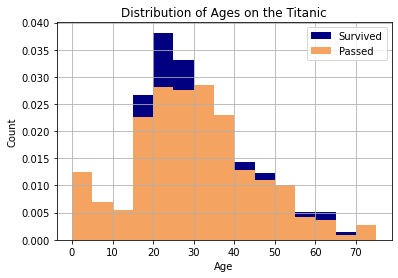

In [113]:
my_bins = range(0,80,5)
fig, ax = plt.subplots(1,1)
#data frame with only survivors
dfS = dfTitanic[dfTitanic['Survived'] == 1]
#data frame with no survivors
dfnoS = dfTitanic[dfTitanic['Survived'] == 0]
#plot
dfS.hist(bins = my_bins, column = 'Age', ax = ax, color = 'navy', density = True)
dfnoS.hist(bins = my_bins, column = 'Age', ax = ax, color = 'sandybrown', density = True)
#labels
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ages on the Titanic')
#create legend
labels= ["Survived","Passed"]
plt.legend(labels)

The figure suggests that people aged 30 to 40 years old had more deaths compared to survivors. Also only a third of the youngest age group survived. The older passengers, however, had almost equal survivors and deaths meaning they were the most likely age group to survive. On the other hand, no one over 70 survived. This still does not indicate that older people were less likely to survive because this trend does not follow for the other older ages.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

It would be misleading to plot the frequencies because a frequency histogram displays the number of observations or occurances of in each bin on the vertical axis. This does not tell as anything about the probability of survival of one age compared to all the other passengers. A density histogram, on the other hand, normalizes all the heights of the bins by the total area such that the area of all the bins equals 1. This means that we get a probability of that age's survival on the vertical axis.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

The data mostly suggests male chivalry because women, regardless of class, always had a higher probability of survival. Younger/healthier people did not 'overpower' the elderly because, while there were more younger people who survived, there were also more younger passengers in general on the boat and more that did not survive. In other words, there was a greater probaility of survival given an older aged person (60-70) than a younger person (20-30). The calculations above also suggest that there was also no class war because there were more people in third class who survived than first class. There were also more people in third class in general. In order to take into account the populations of the classes, the probabilites should be normalized by their class size, or P(S and class 1)/P(class 1) = P(S|class 1) and so forth for class 3. This yields the result that there was an equal probability of survival regardless of first or third class as shown in the calculations below. This means there was no class war.

In [114]:
#prob of survival given class 1
P_s_class1 = P_s1/len(class1_survive)
print(P_s_class1)
#prob of survival given class 1
P_s_class3 = P_s3/len(class3_survive)
print(P_s_class3)

0.0014005602240896359
0.0014005602240896359


**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}

